

---


# **Objective**


---



**To develop a robust sentiment analysis pipeline that can accurately classify social media posts and reviews as positive, negative or neutral. This pipeline will leverage natural language processing (NLP) techniques to preprocess text data, perform sentiment classification and visualize sentiment trends.**



---


# **Data Collection**


---



### **Loading the Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('Twitter Dataset.csv',
 encoding = 'latin-1',
header = None,
quoting=3,
on_bad_lines ='skip',
names = ['target', 'ids', 'date', 'flag', 'user', 'text'])
df

,target,ids,date,flag,user,text
"""0""","""1467810369""","""Mon Apr 06 22:19:45 PDT 2009""","""NO_QUERY""","""_TheSpecialOne_""","""@switchfoot http://twitpic.com/2y1zl - Awww",that's a bummer. You shoulda got David Carr ...
"""0""","""1467810672""","""Mon Apr 06 22:19:49 PDT 2009""","""NO_QUERY""","""scotthamilton""","""is upset that he can't update his Facebook by...",NaN
"""0""","""1467810917""","""Mon Apr 06 22:19:53 PDT 2009""","""NO_QUERY""","""mattycus""","""@Kenichan I dived many times for the ball. Ma...",NaN
"""0""","""1467811184""","""Mon Apr 06 22:19:57 PDT 2009""","""NO_QUERY""","""ElleCTF""","""my whole body feels itchy and like its on fire """,NaN
"""0""","""1467811193""","""Mon Apr 06 22:19:57 PDT 2009""","""NO_QUERY""","""Karoli""","""@nationwideclass no",it's not behaving at all. i'm mad. why am i h...
...,...,...,...,...,...,...
"""0""","""1559571899""","""Sun Apr 19 11:29:33 PDT 2009""","""NO_QUERY""","""HayyItsRay""","""@its_anne Yeahh but I had to do hecka homewor...",NaN
"""0""","""1559571990""","""Sun Apr 19 11:29:35 PDT 2009""","""NO_QUERY""","""mbixel""","""Back in Cbus","too much work """
"""0""","""1559572046""","""Sun Apr 19 11:29:35 PDT 2009""","""NO_QUERY""","""lauragvermeulen""","""Trying to write my thesis """,NaN
"""0""","""1559572110""","""Sun Apr 19 11:29:35 PDT 2009""","""NO_QUERY""","""EJDyer""","""Still working hard on the re-launch of sporti...",if only the export of data from amazon had be...


### **Displaying the Header**

In [ ]:
df.head(0)

,target,ids,date,flag,user,text


### **Mapping the target to sentiment Labels**

In [ ]:
df['sentiment'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

### **Dropping unnecessary columns**

In [ ]:
df = df[['text', 'sentiment']]



---


# **Text Preprocessing**


---



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
  if not isinstance(text, str):
    return []
  tokens = word_tokenize(text)
  tokens = [token.lower() for token in tokens]
  tokens = [token for token in tokens if token not in string.punctuation]
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return tokens

df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-5-175c1c99a253>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(preprocess_text)




---


# **Sentiment Analysis**


---



In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
  sentiment = analyzer.polarity_scores(text)
  return sentiment

df['sentiment_scores'] = df['processed_text'].apply(analyze_sentiment)

def determine_sentiment(scores):
  compound = scores['compound']
  if compound >= 0.05:
    return 'positive'
  elif compound <= -0.05:
      return 'negative'
  else:
       return 'neutral'

df['predicted_sentiment'] = df['sentiment_scores'].apply(determine_sentiment)
sentiment_counts = df['predicted_sentiment'].value_counts()

<ipython-input-7-d860637b6fa0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_scores'] = df['processed_text'].apply(analyze_sentiment)
<ipython-input-7-d860637b6fa0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_sentiment'] = df['sentiment_scores'].apply(determine_sentiment)




---


# **Visualization of Sentiment Trends**


---



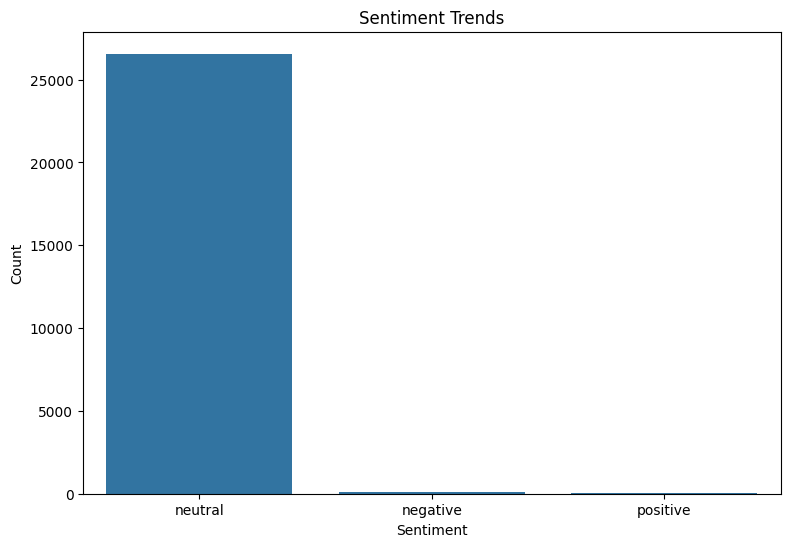

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (9,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Trends')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()